# What is the probability that 6 is the last number visited by the ladybug?


In [19]:
import logging
import random
import sys

logging.basicConfig(
    level=logging.DEBUG,
    format="%(asctime)s - %(name)s - %(levelname)s - %(message)s",
    handlers=[logging.StreamHandler(sys.stdout)],
)

logger = logging.getLogger(__name__)


def random_move() -> int:
    """
    Randomly return -1 for counterclockwise move and 1 for clockwise move.
    """
    return random.choice([-1, 1])


def next_position(current_position, move_direction) -> int:
    """
    Moves the ladybug to the next position, accounting for moving from 12 to 1 and from
    1 to 12 since simply [in,de]crementing the current_position won't work.

    Args:
        current_position (int): value between 1 and 12
        move_direction (int): 1 equates to clockwise, -1 to counterclockwise
    Returns:
        int: value between 1 and 12, one position away from the `current_position` in the
            indicated `move_direction`
    """
    if (next_position := current_position + move_direction) >= 1 and next_position <= 12:
        return next_position
    # Moving clockwise from 12 to 1
    elif next_position == 13:
        return 1
    # Where `next_position = 0`, moving counterclockwise from 1 to 12
    else:
        return 12


def simulate_round() -> int:
    """
    The ladybug visits all positions on the clock face until each has been visited at least once.
    The round is completed after landing on the last not-yet-visited position. That position is
    the `last_position` result of the round, returned as an int with possible values 1, 2, ..., 10, 11.

    Returns:
        int: last position (number) on the clock face to be visited during the round
    """
    ALL_POSITIONS = {pos for pos in range(1, 13, 1)}

    # Initialize with 12 since that's always the ladybug's starting position for a new round
    current_position = 12
    positions_visited = {current_position}
    position_history = [current_position]

    while len(positions_visited) <= 11:
        # Move the ladybug and update tracking if on a new number during the round
        next_pos = next_position(current_position, random_move())
        current_position = next_pos
        positions_visited.add(current_position)
        position_history.append(current_position)

        # Return early even before we visit the last number if there's only one remaining number which hasn't been visited
        remaining_pos = ALL_POSITIONS - positions_visited
        if len(remaining_pos) == 1:
            last_position = list(remaining_pos)[0]
            # logger.info(f"{position_history=}")
            # logger.info(f"{positions_visited=}")
            return last_position

In [20]:
simulate_round()

2

In [21]:
from collections import Counter


# TODO: parallelize this by using concurrent.futures instead of a for loop
def simulate_n_rounds(num_rounds: int = 1_000) -> float:
    """Returns the proportion of rounds for which 6 was the final not-yet-visited position to be visited"""
    # Counter keys:   number on the clock face 1-11 (excluding 12 since we start there)
    # Counter values: number of times the given clock number was the last one visited during a round
    last_number_visited_counter = Counter[int]()

    for i in range(num_rounds):
        last_number_visited_counter[simulate_round()] += 1

    # sorted_by_key_counter = dict(sorted(last_number_visited_counter.items()))
    # logger.info(f"{sorted_by_key_counter=}")
    return round((last_number_visited_counter[6] / num_rounds), 4)


proportion_of_6s_as_final_position = list()

for i in range(1_000):
    proportion_of_6s_as_final_position.append(simulate_n_rounds(num_rounds=100))

In [22]:
import matplotlib.pyplot as plt

2026-01-27 20:05:05,339 - matplotlib - DEBUG - matplotlib data path: /Users/jaredhansen/Documents/projects_code/math-puzzles/1_the_ladybug_clock_puzzle/.venv/lib/python3.12/site-packages/matplotlib/mpl-data
2026-01-27 20:05:05,349 - matplotlib - DEBUG - CONFIGDIR=/Users/jaredhansen/.matplotlib
2026-01-27 20:05:05,360 - matplotlib - DEBUG - interactive is False
2026-01-27 20:05:05,360 - matplotlib - DEBUG - platform is darwin
2026-01-27 20:05:05,377 - matplotlib - DEBUG - CACHEDIR=/Users/jaredhansen/.matplotlib
2026-01-27 20:05:05,380 - matplotlib.font_manager - DEBUG - Using fontManager instance from /Users/jaredhansen/.matplotlib/fontlist-v390.json


In [23]:
max(proportion_of_6s_as_final_position)

0.2

2026-01-27 20:05:11,483 - matplotlib.pyplot - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2026-01-27 20:05:11,484 - matplotlib.pyplot - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2026-01-27 20:05:11,486 - matplotlib.font_manager - DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2026-01-27 20:05:11,487 - matplotlib.font_manager - DEBUG - findfont: score(FontEntry(fname='/Users/jaredhansen/Documents/projects_code/math-puzzles/1_the_ladybug_clock_puzzle/.venv/lib/python3.12/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Bold.ttf', name='DejaVu Sans', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 0.33499999999999996
2026-01-27 20:05:11,487 - matplotlib.font_manager - DEBUG - findfont: score(FontEntry(fname='/Users/jaredhansen/Documents/projects_code/math-puzzles/1_the_ladybug_clock_puzzle/.venv/lib/python3.12/s

(array([  5.,   0.,   0.,   0.,  32.,   0.,   0.,   0.,   0.,  63.,   0.,
          0.,   0.,   0.,  82.,   0.,   0.,   0., 126.,   0.,   0.,   0.,
          0., 132.,   0.,   0.,   0.,   0., 135.,   0.,   0.,   0., 128.,
          0.,   0.,   0.,   0., 109.,   0.,   0.,   0.,   0.,  74.,   0.,
          0.,   0.,   0.,  48.,   0.,   0.,   0.,  30.,   0.,   0.,   0.,
          0.,  18.,   0.,   0.,   0.,   0.,   9.,   0.,   0.,   0.,   5.,
          0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   1.]),
 array([0.03    , 0.032125, 0.03425 , 0.036375, 0.0385  , 0.040625,
        0.04275 , 0.044875, 0.047   , 0.049125, 0.05125 , 0.053375,
        0.0555  , 0.057625, 0.05975 , 0.061875, 0.064   , 0.066125,
        0.06825 , 0.070375, 0.0725  , 0.074625, 0.07675 , 0.078875,
        0.081   , 0.083125, 0.08525 , 0.087375, 0.0895  , 0.091625,
        0.09375 , 0.095875, 0.098   , 0.100125, 0.10225 , 0.104375,
        0.1065  , 0.108625, 0.11075 , 0.112875

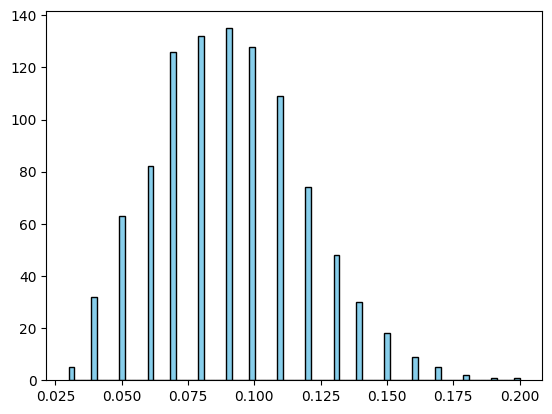

In [24]:
plt.hist(proportion_of_6s_as_final_position, bins=80, color="skyblue", edgecolor="black")

In [25]:
import pandas as pd


def distribution_stats_of_sampling(series: list[float]):
    pd_series = pd.Series(series)
    return pd_series.describe()

In [26]:
distribution_stats_of_sampling(proportion_of_6s_as_final_position)

count    1000.000000
mean        0.090880
std         0.028111
min         0.030000
25%         0.070000
50%         0.090000
75%         0.110000
max         0.200000
dtype: float64

In [ ]:
proportion_of_6s_as_final_position_v2 = []

for i in range(10_000):
    proportion_of_6s_as_final_position_v2.append(simulate_n_rounds(num_rounds=1_000))

In [ ]:
distribution_stats_of_sampling(proportion_of_6s_as_final_position_v2)

count    10000.000000
mean         0.090847
std          0.009077
min          0.059000
25%          0.085000
50%          0.091000
75%          0.097000
max          0.128000
dtype: float64

(array([  2.,   3.,   0.,   2.,   1.,   5.,   5.,  12.,  17.,  13.,  24.,
         27.,  41.,  50.,  58.,  69.,  89., 107., 153., 159., 192., 213.,
        265., 284., 294., 344., 375., 362., 422., 452., 449., 471., 457.,
        425., 364., 372., 403., 363., 345., 305., 289., 272., 235., 200.,
        181., 151., 117., 102.,  90.,  75.,  73.,  48.,  45.,  34.,  23.,
         18.,  18.,  12.,   3.,   7.,   3.,   2.,   4.,   0.,   1.,   0.,
          0.,   0.,   2.,   1.]),
 array([0.059     , 0.05998571, 0.06097143, 0.06195714, 0.06294286,
        0.06392857, 0.06491429, 0.0659    , 0.06688571, 0.06787143,
        0.06885714, 0.06984286, 0.07082857, 0.07181429, 0.0728    ,
        0.07378571, 0.07477143, 0.07575714, 0.07674286, 0.07772857,
        0.07871429, 0.0797    , 0.08068571, 0.08167143, 0.08265714,
        0.08364286, 0.08462857, 0.08561429, 0.0866    , 0.08758571,
        0.08857143, 0.08955714, 0.09054286, 0.09152857, 0.09251429,
        0.0935    , 0.09448571, 0.09547143, 0.

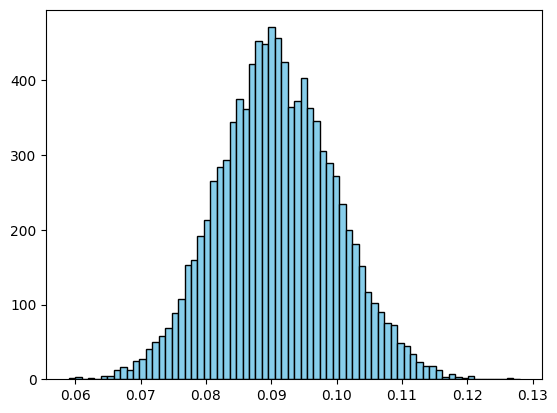

In [ ]:
plt.hist(proportion_of_6s_as_final_position_v2, bins=70, color="skyblue", edgecolor="black")